In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. Collect or Load Data

In [2]:
df = pd.read_csv('Salary_dataset.csv')

In [3]:
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


## 2. Domain Analysis

## Domain Analysis: Salary Dataset

### 1. Domain Overview
This dataset belongs to the **Human Resources** and **Labor Economics** domain. It is commonly used to study the relationship between an employee’s years of experience and their salary. Such datasets help in analyzing compensation trends and building predictive models.

### 2. Attributes Description
- **Unnamed: 0**: Index column, likely auto-generated. Not useful for analysis.
- **YearsExperience**: Numeric value representing total years of professional experience.
- **Salary**: Numeric value representing annual salary in currency units.

### 3. Use Cases
- **Predictive Modeling**: Predicting salary based on years of experience.
- **Compensation Analysis**: Understanding how salaries scale with experience.
- **HR Policy Making**: Assisting HR in defining fair pay structures.
- **Career Planning**: Estimating future salary expectations.

### 4. Insights from Sample Data
- A general positive trend exists between experience and salary.
- There are noticeable salary differences for the same experience, suggesting potential influence of other factors.
- Experience ranges from **1.2 years to 6.9 years**, with salaries ranging from around **₹39,000 to ₹91,000**.

### 5. Possible Next Steps
- **Data Cleaning**: Remove the `Unnamed: 0` column.
- **Data Visualization**: Use scatter plots to study relationships.
- **Model Building**: Fit a linear regression model to predict salary.
- **Model Evaluation**: Analyze residuals and metrics to assess performance.


## 3. Basic Check

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [5]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


## 4. EDA(Exploratory Data Analysis)

### i. Univariate Analysis

In [6]:
col = df.drop("Unnamed: 0", axis = 1)

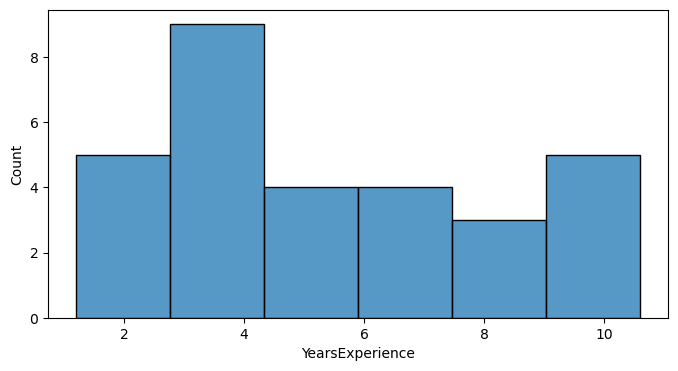

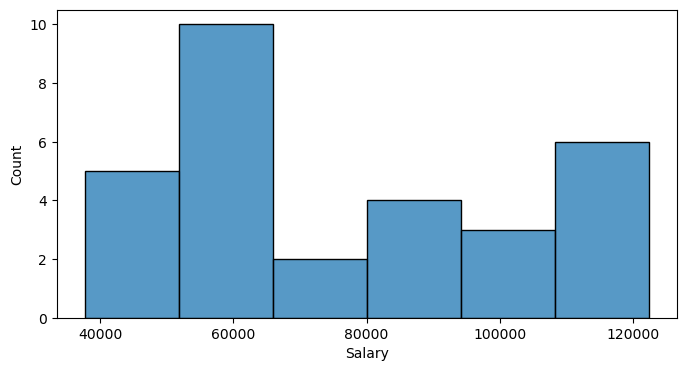

In [7]:
for i in col:
    plt.figure(figsize=(8,4))
    sns.histplot(x=i, data=df)
    plt.show()

### ii. Bivariate Analysis

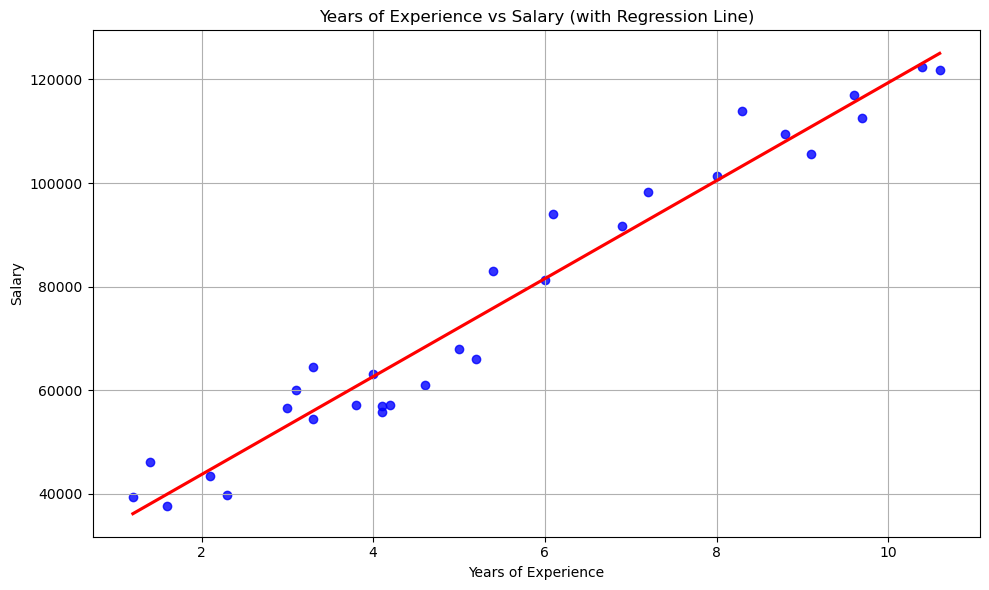

In [8]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='YearsExperience', y='Salary', ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('Years of Experience vs Salary (with Regression Line)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.tight_layout()
plt.show()

### iii. Multivariate Analysis

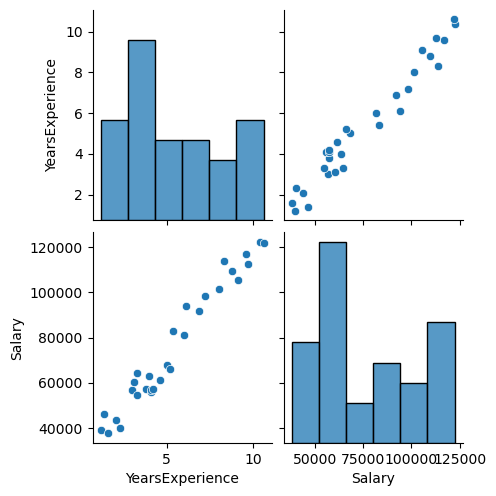

In [9]:
sns.pairplot(col)

## 5. Data Preprocessing

### i. checking for Outliers and Null Values

<Axes: xlabel='YearsExperience'>

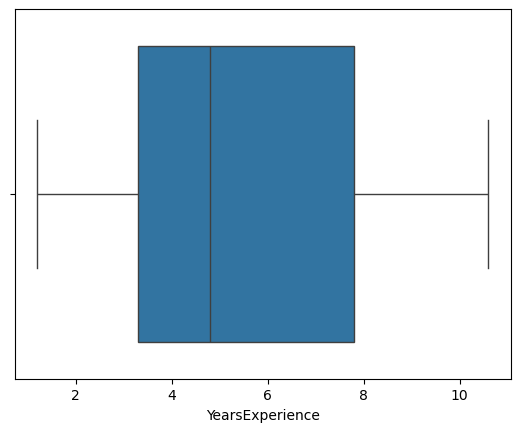

In [10]:
sns.boxplot(x=df['YearsExperience'], data=df)

<Axes: xlabel='Salary'>

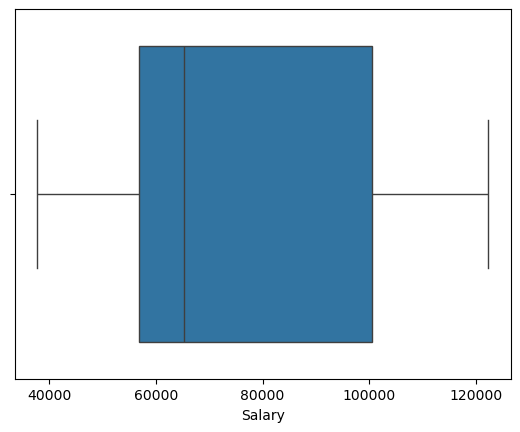

In [11]:
sns.boxplot(x=df['Salary'], data=df)

In [12]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

#### -> As we can see we dont have outlier and Null values

### ii. Scalling

In [13]:
# removed unwanted column permanently
df = col
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns = df.columns)
scaled_df

,YearsExperience,Salary
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781
5,-0.864935,-0.718307
6,-0.829096,-0.588158
7,-0.757416,-0.799817
8,-0.757416,-0.428810
9,-0.578216,-0.698013


#### -> As we have only two columns we can skip the feature selection and feature extraction part

## 6. Split the data

In [15]:
X = scaled_df[['YearsExperience']]
y= scaled_df.Salary

In [16]:
X

,YearsExperience
0,-1.510053
1,-1.438373
2,-1.366693
3,-1.187494
4,-1.115814
5,-0.864935
6,-0.829096
7,-0.757416
8,-0.757416
9,-0.578216


In [17]:
y

0    -1.360113
1    -1.105527
2    -1.419919
3    -1.204957
4    -1.339781
5    -0.718307
6    -0.588158
7    -0.799817
8    -0.428810
9    -0.698013
10   -0.474333
11   -0.749769
12   -0.706620
13   -0.702020
14   -0.552504
15   -0.299217
16   -0.370043
17    0.262859
18    0.198860
19    0.665476
20    0.583780
21    0.826233
22    0.938611
23    1.402741
24    1.240203
25    1.097402
26    1.519868
27    1.359074
28    1.721028
29    1.701773
Name: Salary, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

## 7, Fit the data to the model

In [19]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

LinearRegression()

## 8. Evaluation of the model

In [26]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_predict = model.predict(X_test)
print("R2 score:",r2_score(y_test, y_predict))
print("MAE:",mean_absolute_error(y_test, y_predict))
print("MSE:",mean_squared_error(y_test, y_predict))

R2 score: 0.8928775350863084
MAE: 0.22725791462680564
MSE: 0.06723124814976784
